<a href="https://colab.research.google.com/github/KarolineCostadaSilva/curso_fotografia_computacional/blob/main/Semana%201/Resolucao_espacial_diminuicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Operações sobre a resolução espacial em imagens com uso de interpolação

In [ ]:
#importar bibliotecas e realizar clone de imagens
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
if os.path.isdir("imgcourse"):
  print("Diretório já existe!")
else:
  !git clone https://github.com/mhsacampos/imgcourse

Cloning into 'imgcourse'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 3), reused 21 (delta 2), pack-reused 0
Receiving objects: 100% (22/22), 6.23 MiB | 19.38 MiB/s, done.
Resolving deltas: 100% (3/3), done.


# **Algoritmo para redução da resolução espacial**

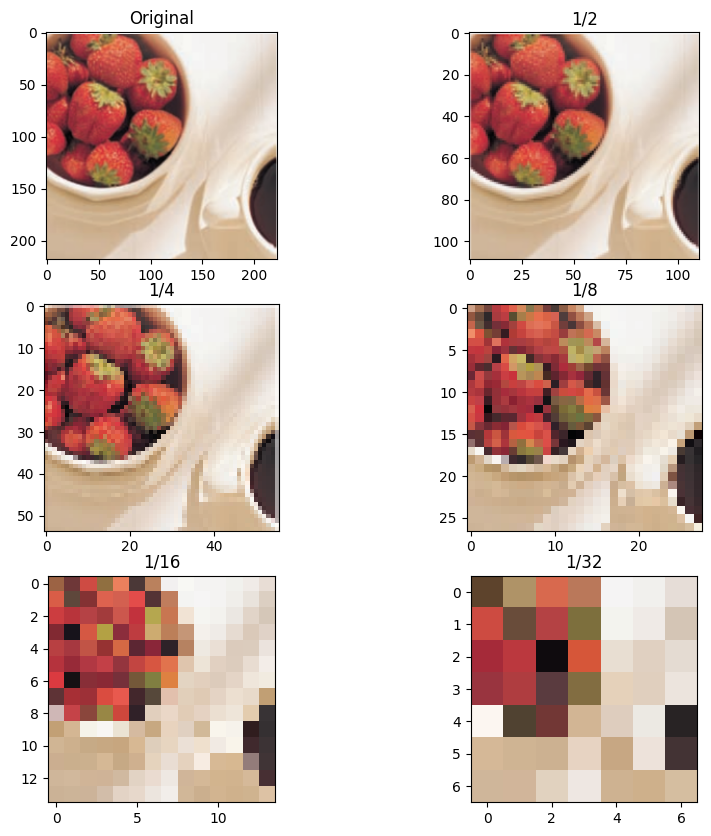

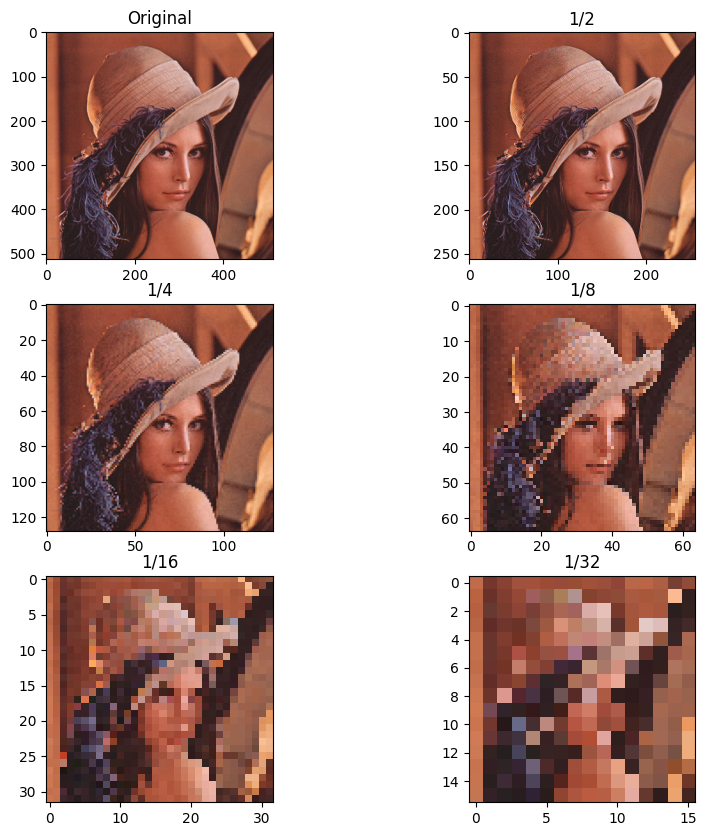

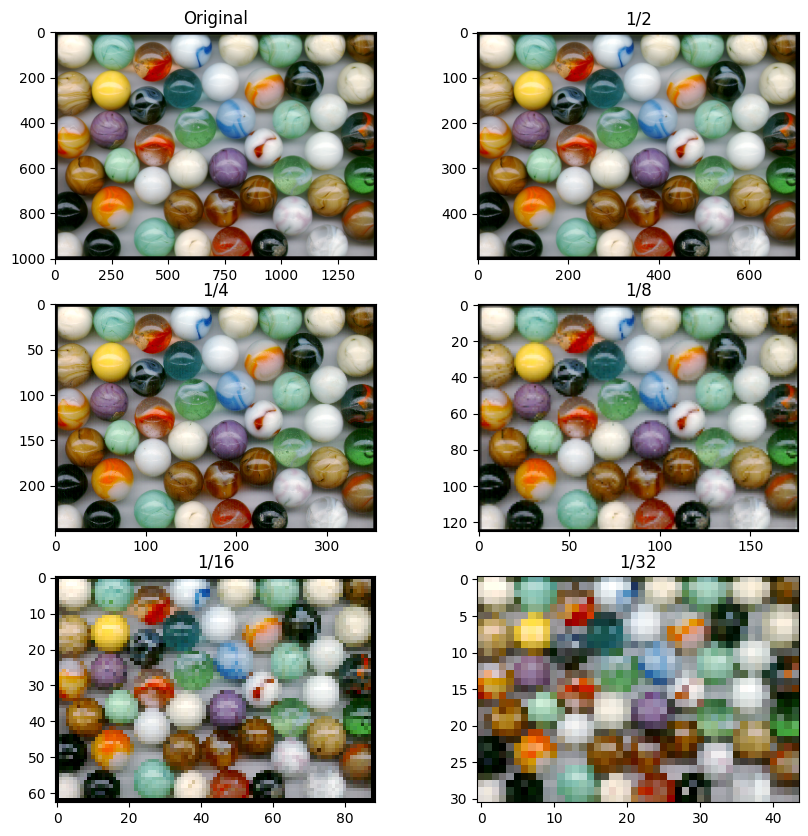

In [ ]:
#Seleção do tipo de interpolação a ser usada: INTER_CUBIC ou INTER_AREA
FlagInterpCubic = True

if FlagInterpCubic:
    interp = cv2.INTER_CUBIC
else:
    interp = cv2.INTER_AREA


images = ["./imgcourse/Morangos.bmp",
          "./imgcourse/lena.png",
          "./imgcourse/marbles.bmp" ]

for im_path in images:
    # Loading the image
    image = cv2.imread(im_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    metade = cv2.resize(image, (0, 0), fx = 0.5, fy = 0.5,interpolation=interp)
    um_quarto = cv2.resize(image, (0, 0), fx = 0.25, fy = 0.25,interpolation=interp)
    um_oitavo = cv2.resize(image, (0, 0), fx = 0.125, fy = 0.125,interpolation=interp)
    um_16 = cv2.resize(image, (0, 0), fx = 0.0625, fy = 0.0625,interpolation=interp)
    um_32 = cv2.resize(image, (0, 0), fx = 0.03125, fy = 0.03125,interpolation=interp)

    Titles =["Original", "1/2", "1/4", "1/8", "1/16", "1/32"]
    images =[image, metade, um_quarto, um_oitavo, um_16, um_32]
    count = 6

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
    for i in range(count):
        plt.subplot(3, 2, i + 1)
        plt.title(Titles[i])
        plt.imshow(images[i])

    plt.show()
    print("\n\n")

# Comparação do efeito de interpolação

<ipython-input-3-77b2791cab8d>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


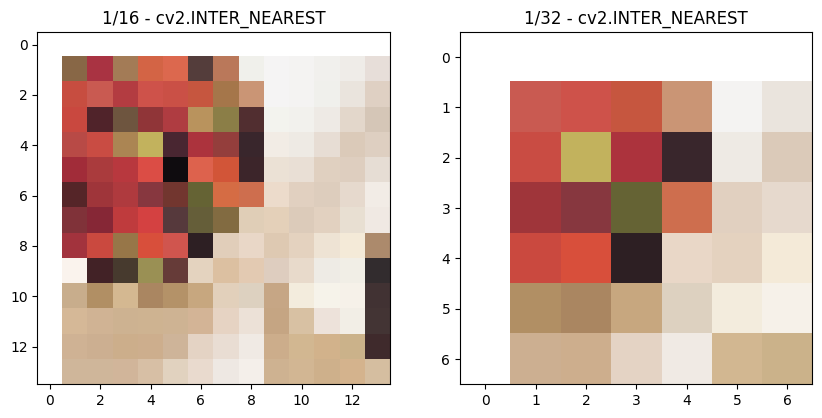

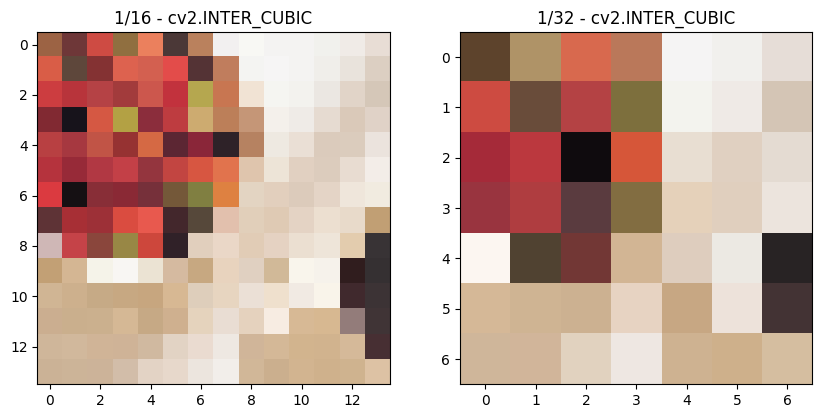

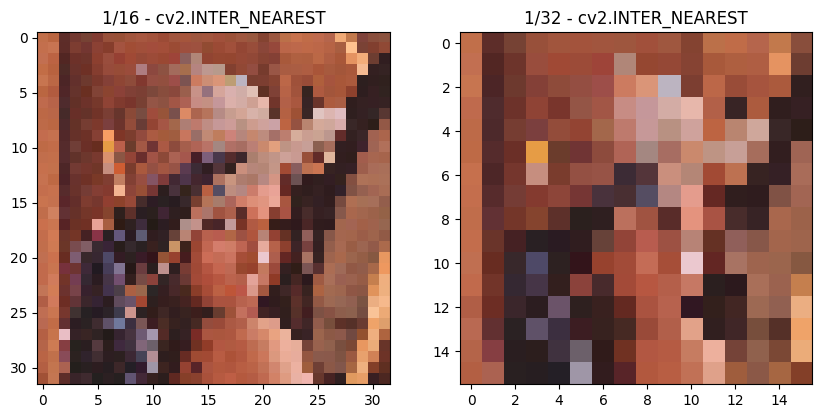

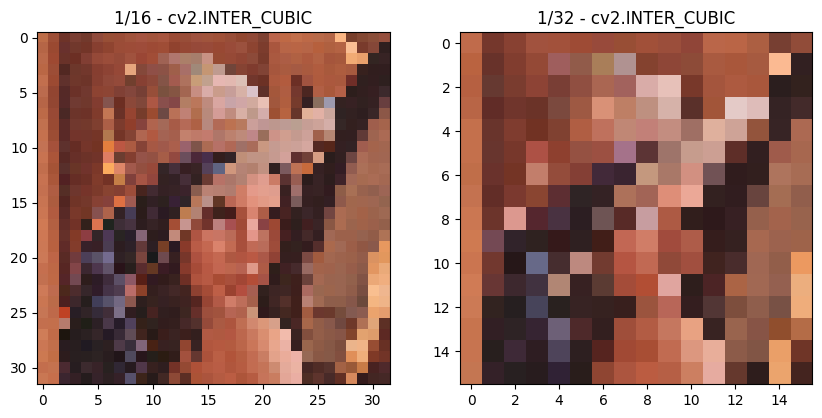

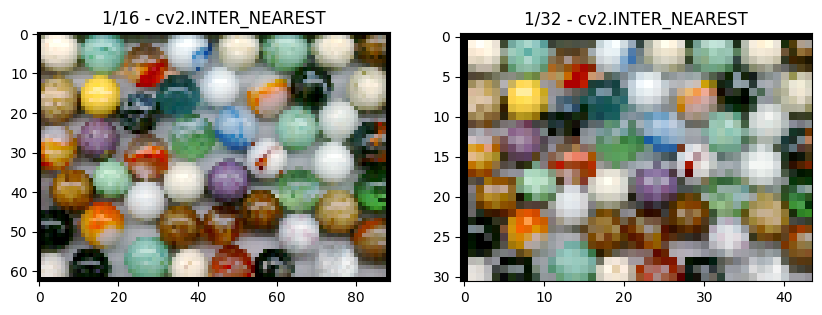

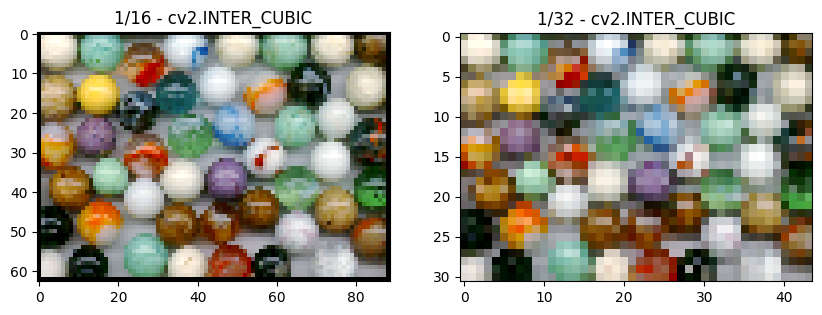

In [ ]:


# interpolacoes = [cv2.INTER_AREA, cv2.INTER_CUBIC]
interpolacoes = [cv2.INTER_NEAREST, cv2.INTER_CUBIC]




images = ["./imgcourse/Morangos.bmp",
          "./imgcourse/lena.png",
          "./imgcourse/marbles.bmp" ]

for im_path in images:
    for interp in interpolacoes:
        # Loading the image
        image = cv2.imread(im_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


        um_16 = cv2.resize(image, (0, 0), fx = 0.0625, fy = 0.0625,interpolation=interp)
        um_32 = cv2.resize(image, (0, 0), fx = 0.03125, fy = 0.03125,interpolation=interp)

        if interp == cv2.INTER_NEAREST:
           TypeInterpol = " - cv2.INTER_NEAREST"
        else:
           TypeInterpol = " - cv2.INTER_CUBIC"

        Titles =["1/16" + TypeInterpol, "1/32" + TypeInterpol]
        images =[ um_16, um_32]
        count = 2

        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
        for i in range(count):
            plt.subplot(1, 2, i + 1)
            plt.title(Titles[i])
            plt.imshow(images[i])

        plt.show()
